In [319]:
import pandas as pd
import numpy as np
df = pd.read_csv('data4.csv')

In [320]:
df=df.loc[:, ['Name', 'Price($)','Milage','Badge']]
df

,Name,Price($),Milage,Badge
0,2021 Toyota Camry SE,"31,150","13,390",Good Deal
1,2021 Toyota Supra 3.0 Premium,"58,981","7,348",Great Deal
2,2019 Toyota Sequoia Platinum,"51,999","55,121",Great Deal
3,2019 Toyota Camry SE,"25,689","49,126",Good Deal
4,2017 Toyota Highlander Limited,"31,591","84,621",Good Deal
...,...,...,...,...
995,2019 Toyota RAV4 Hybrid XLE,"36,981","11,872",Good Deal
996,2010 Toyota Prius IV,"7,995","1,90,884",Good Deal
997,2000 Toyota 4Runner SR5,"15,995","1,45,199",Home Delivery
998,2019 Toyota Corolla LE,"19,989","23,814",Good Deal


In [321]:
df2=pd.DataFrame(df['Name'].str.split(' ').tolist())
df['Price($)'] = df['Price($)'].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df['Milage'] = df['Milage'].str.replace(pat=r'[^\w]', repl=r'', regex=True)

In [322]:
df2.replace(to_replace=[None], value=np.nan, inplace=True)
df

,Name,Price($),Milage,Badge
0,2021 Toyota Camry SE,31150,13390,Good Deal
1,2021 Toyota Supra 3.0 Premium,58981,7348,Great Deal
2,2019 Toyota Sequoia Platinum,51999,55121,Great Deal
3,2019 Toyota Camry SE,25689,49126,Good Deal
4,2017 Toyota Highlander Limited,31591,84621,Good Deal
...,...,...,...,...
995,2019 Toyota RAV4 Hybrid XLE,36981,11872,Good Deal
996,2010 Toyota Prius IV,7995,190884,Good Deal
997,2000 Toyota 4Runner SR5,15995,145199,Home Delivery
998,2019 Toyota Corolla LE,19989,23814,Good Deal


In [323]:
df2['car name']=df2[2]

In [324]:
df[['car name','year']]=df2[['car name', 0]]
df3=df.loc[:,['Milage', 'Price($)','car name','year']]

In [325]:
df3.set_index(['car name'], inplace = True)

In [326]:
print(df3.dtypes)
df3[['Price($)','Milage','year']]=df3[['Price($)','Milage','year']].apply(pd.to_numeric)
df=df3

Milage      object
Price($)    object
year        object
dtype: object


In [327]:
df3.groupby(['car name','year'])[['Price($)','Milage']].mean().round()

Price($)    Milage
car name year                    
4Runner  2000   13995.0  132796.0
         2004    9500.0  200439.0
         2006   10260.0  232537.0
         2007   14949.0  178971.0
         2008   17900.0  122000.0
...                 ...       ...
Tundra   2019   47770.0   31196.0
         2020   47473.0   21062.0
         2021   48844.0   17169.0
Venza    2010   14995.0   25557.0
         2021   38884.0   13905.0

[143 rows x 2 columns]

In [328]:
import matplotlib.pyplot as plt
df.groupby('car name').nunique()

,Milage,Price($),year
car name,,,
4Runner,125,122,15
Avalon,12,12,8
C-HR,23,22,3
Camry,135,128,13
Corolla,75,71,9
FJ,3,3,2
Highlander,171,164,15
Land,18,18,9
Matrix,1,1,1


In [329]:
df_4Runner= df.loc['4Runner',:]
df_Camry= df.loc['Camry',:]
df_Highlander= df.loc['Highlander',:]
df_Prius= df.loc['Prius',:]
df_RAV4= df.loc['RAV4',:]
df_Tacoma= df.loc['Tacoma',:]
df_Tundra= df.loc['Tundra',:]
df_Corolla=df.loc['Corolla',:]
df.groupby('car name').nunique()

,Milage,Price($),year
car name,,,
4Runner,125,122,15
Avalon,12,12,8
C-HR,23,22,3
Camry,135,128,13
Corolla,75,71,9
FJ,3,3,2
Highlander,171,164,15
Land,18,18,9
Matrix,1,1,1


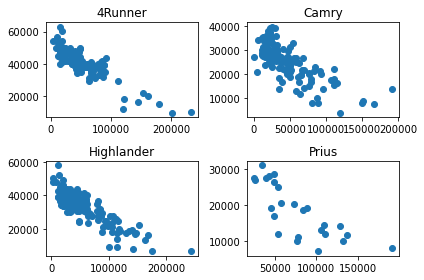

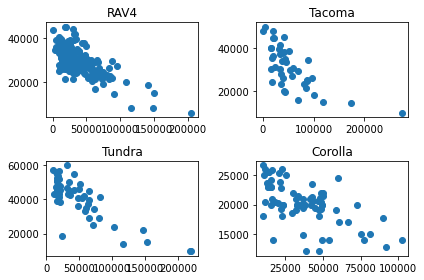

In [330]:
fig1=plt.figure()
fig2=plt.figure()
axes1_1=fig1.add_subplot(2,2,1)
axes1_2=fig1.add_subplot(2,2,2)
axes1_3=fig1.add_subplot(2,2,3)
axes1_4=fig1.add_subplot(2,2,4)
axes2_1=fig2.add_subplot(2,2,1)
axes2_2=fig2.add_subplot(2,2,2)
axes2_3=fig2.add_subplot(2,2,3)
axes2_4=fig2.add_subplot(2,2,4)
axes1_1.plot(df_4Runner['Milage'],df_4Runner['Price($)'],'o')
axes1_2.plot(df_Camry['Milage'],df_Camry['Price($)'],'o')
axes1_3.plot(df_Highlander['Milage'],df_Highlander['Price($)'],'o')
axes1_4.plot(df_Prius['Milage'],df_Prius['Price($)'],'o')
axes2_1.plot(df_RAV4['Milage'],df_RAV4['Price($)'],'o')
axes2_2.plot(df_Tacoma['Milage'],df_Tacoma['Price($)'],'o')
axes2_3.plot(df_Tundra['Milage'],df_Tundra['Price($)'],'o')
axes2_4.plot(df_Corolla['Milage'],df_Corolla['Price($)'],'o')
axes1_1.set_title('4Runner')
axes1_2.set_title('Camry')
axes1_3.set_title('Highlander')
axes1_4.set_title('Prius')
axes2_1.set_title('RAV4')
axes2_2.set_title('Tacoma')
axes2_3.set_title('Tundra')
axes2_4.set_title('Corolla')
fig1.tight_layout()
fig2.tight_layout()


In [331]:
train_df=df
test_df=pd.read_csv('audi.csv')

[-0.15079581]


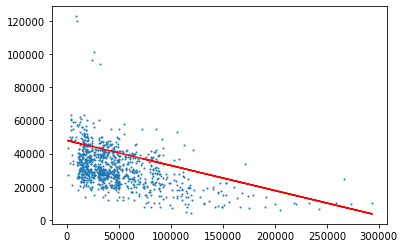

In [332]:
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
X=np.array(train_df['Milage']).reshape(-1,1)
y=train_df['Price($)']
lr=LinearRegression()
lr.fit(X,y)
print(lr.coef_)
w=lr.coef_[0]

milage=train_df['Milage']
train_ave=milage.mean()

plt.scatter(X,y,s=1)
plt.plot(X, w*X+train_ave,c='red')

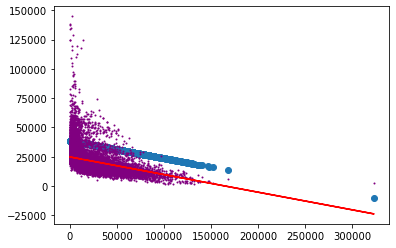

In [333]:
test_X=np.array(test_df['mileage']).reshape(-1,1)
pred_y = lr.predict(test_X)

plt.scatter(test_X, pred_y)
plt.plot(test_X, w*test_X+test_ave, c='red')

test_milage=test_df['mileage']
test_ave=test_milage.mean()
test_y=test_df['price']

plt.scatter(test_X, test_y, c='purple', s=1)


252634979.32200748 111013098.02564073
-0.8410319732107352


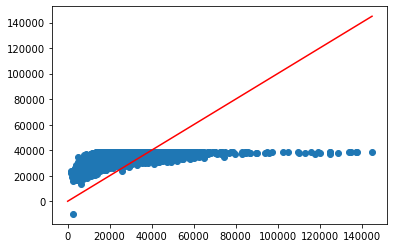

In [334]:
from sklearn.metrics import mean_squared_error
test_loss=mean_squared_error(test_y, pred_y)

train_y = lr.predict(X)
train_loss = mean_squared_error(y, train_y)

print(test_loss, train_loss)
plt.scatter(test_y,pred_y)
plt.plot([0,np.max(test_y)],[0,np.max(test_y)], color='red')

from sklearn.metrics import r2_score
r2=r2_score(test_y, pred_y)
print(r2)